In [2]:
from keras.datasets import mnist
(_, _), (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0], -1)
test_images = test_images.astype('float32') / 255.0


In [3]:
import tensorflow as tf
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)



313/313 [==============================] - 2s 4ms/step


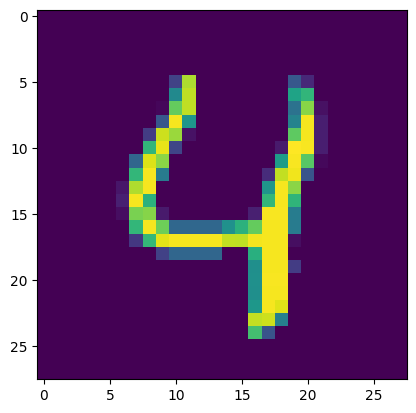

In [11]:
import numpy as np 
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

test1=np.array(test_images[4])
test1 = test1.reshape((28,28))

imshow(test1)

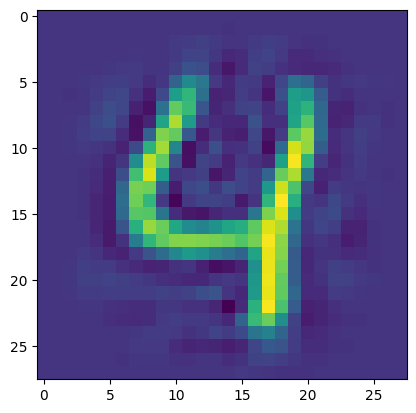

In [12]:
test1ec=np.array(reconstructed_images[4])
test1ec = test1ec.reshape((28,28))
imshow(test1ec)

In [6]:
def MSE(pixels,pixelsec):
    pixels=np.array(pixels)
    pixelsec=np.array(pixelsec)
    sum=0
    for i in range(pixels.size):
        sum=sum+((1/pixels.size)*(pixels[i]-pixelsec[i])**2)
    return sum

mse=np.array([])
for i in range(10000):
    mse=np.append(mse,MSE(test_images[i],reconstructed_images[i]))

mse

array([0.0040069 , 0.00985843, 0.00217368, ..., 0.0050628 , 0.008973  ,
       0.00988503])

(array([ 27., 133., 237., 256., 298., 436., 559., 722., 783., 805., 740.,
        721., 665., 594., 477., 452., 379., 299., 252., 188., 189., 132.,
        120., 128.,  84.,  50.,  48.,  45.,  34.,  23.,  21.,  23.,  17.,
         16.,   7.,   5.,   7.,   8.,   5.,   5.,   1.,   1.,   2.,   1.,
          2.,   1.,   0.,   0.,   0.,   2.]),
 array([0.00129561, 0.00168007, 0.00206454, 0.00244901, 0.00283348,
        0.00321794, 0.00360241, 0.00398688, 0.00437135, 0.00475581,
        0.00514028, 0.00552475, 0.00590922, 0.00629368, 0.00667815,
        0.00706262, 0.00744709, 0.00783155, 0.00821602, 0.00860049,
        0.00898496, 0.00936942, 0.00975389, 0.01013836, 0.01052283,
        0.01090729, 0.01129176, 0.01167623, 0.0120607 , 0.01244516,
        0.01282963, 0.0132141 , 0.01359857, 0.01398303, 0.0143675 ,
        0.01475197, 0.01513644, 0.0155209 , 0.01590537, 0.01628984,
        0.01667431, 0.01705877, 0.01744324, 0.01782771, 0.01821218,
        0.01859664, 0.01898111, 0.01936558, 0.

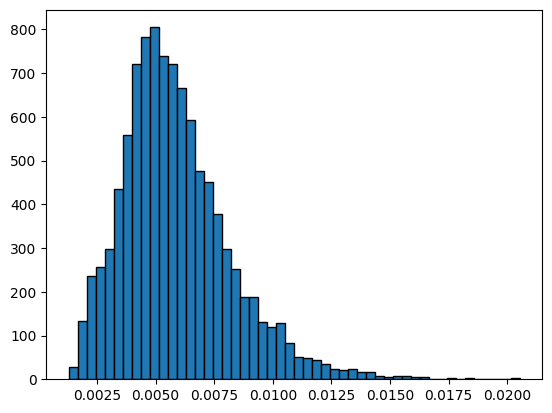

In [13]:
plt.hist(mse,bins=50,edgecolor='black')

In [37]:
from scipy import stats
ks_statistic, p_value = stats.kstest(mse, cdf='norm', args=(np.average(mse), np.std(mse)))
print(p_value)

4.53929716593269e-43
